In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pprint as pp

from qiskit.qobj.utils import MeasLevel
from qiskit_experiments.library.calibration.rabi import Rabi
from qiskit_experiments.calibration_management.routines import roughamp, roughdrag, fineamp
from qiskit_experiments.calibration_management.backend_calibrations import BackendCalibrations
from qiskit_experiments.calibration_management.basis_gate_library import FixedFrequencyTransmon

from qiskit import IBMQ

In [36]:
IBMQ.load_account()

In [3]:
backend = provider.get_backend('ibmq_belem')

Setup the standard calibrations.

In [4]:
library = FixedFrequencyTransmon()
cals = BackendCalibrations(backend, library)

In [5]:
qubits = list(range(backend.configuration().n_qubits))

Run some calibrations

In [15]:
rabi_data = roughamp(cals, qubits, backend, experiment_options={"amplitudes": np.linspace(-0.4, 0.4, 51)})

In [8]:
drag_x_data = roughdrag(cals, qubits, backend)

In [19]:
fine_x_data = fineamp(cals, qubits, backend)

Inspect the results

In [31]:
qubit = 2

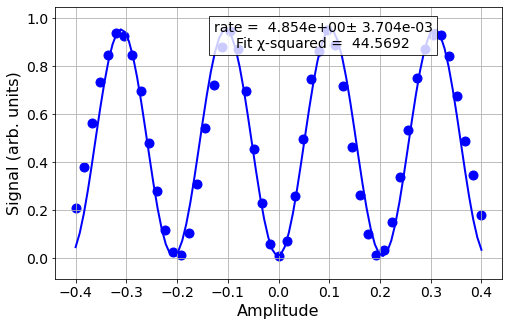

In [32]:
rabi_data.component_experiment_data(qubit).figure(0)

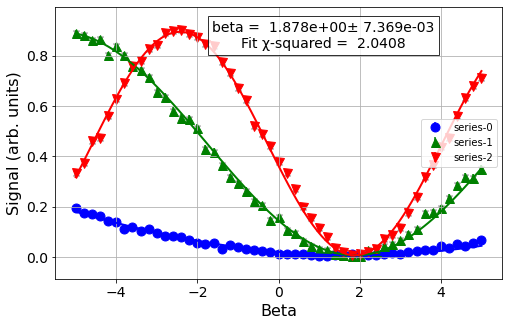

In [33]:
drag_x_data.component_experiment_data(qubit).figure(0)

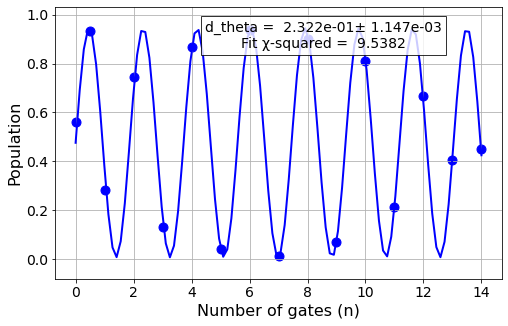

In [34]:
fine_x_data.component_experiment_data(qubit).figure(0)

In [30]:
import pandas as pd

pd.DataFrame(cals.parameters_table(qubit_list=[3], parameters=["amp", "β"], schedules=["x"]))

,value,date_time,valid,exp_id,group,qubits,parameter,schedule
0,0.283506+0.000000j,2021-07-28 12:13:57.252955+0000,True,e2fde110-ac4a-4df9-bbc4-daa6960a70d5,default,"(3,)",amp,x
1,0.246263+0.000000j,2021-07-28 12:19:40.829282+0000,True,84fd0fe4-83c5-44f9-8771-1650fe06a5c7,default,"(3,)",amp,x
2,0.252693+0.000000j,2021-07-28 12:20:44.252915+0000,True,a9c5a503-6277-4ce8-a913-77ee61e3a9e5,default,"(3,)",amp,x
3,0.251529+0.000000j,2021-07-28 12:21:58.174602+0000,True,781beff8-7422-408e-8bde-34e6876b3e95,default,"(3,)",amp,x
4,0.289798+0.000000j,2021-07-28 12:25:59.928995+0000,True,838eaf53-be63-4359-87f6-cf58fb091f21,default,"(3,)",amp,x
5,-1.823066+0.000000j,2021-07-28 12:15:49.079703+0000,True,16e715d5-d1fa-4ba2-9a89-6e4e257c2cc9,default,"(3,)",β,x


In [29]:
#drag_sx_data = roughdrag(cals, qubits, backend, schedule_name="sx")
#drag_sx_data.component_experiment_data(2).figure(0)
#fine_sx_data = fineamp(cals, qubits, backend, angle=np.pi/2)